<a href="https://colab.research.google.com/github/ajadi473/machine_learning/blob/Nigerian-Indegenious-Foods/Copy_of_IndeginousFoods.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [0]:
%reload_ext autoreload
%autoreload 2
%matplotlib inline 
import pandas as pd

# importing the fast ai library

from fastai.vision import *
from fastai.metrics import error_rate

In [0]:
import warnings
warnings.filterwarnings("ignore", category=UserWarning, module="torch.nn.functional")
# Suppress extraneous warnings

In [0]:
from google.colab import drive
drive.mount('/content/gdrive')
# authemticate google drive 

Go to this URL in a browser: https://accounts.google.com/o/oauth2/auth?client_id=947318989803-6bn6qk8qdgf4n4g3pfee6491hc0brc4i.apps.googleusercontent.com&redirect_uri=urn%3Aietf%3Awg%3Aoauth%3A2.0%3Aoob&scope=email%20https%3A%2F%2Fwww.googleapis.com%2Fauth%2Fdocs.test%20https%3A%2F%2Fwww.googleapis.com%2Fauth%2Fdrive%20https%3A%2F%2Fwww.googleapis.com%2Fauth%2Fdrive.photos.readonly%20https%3A%2F%2Fwww.googleapis.com%2Fauth%2Fpeopleapi.readonly&response_type=code

Enter your authorization code:
··········
Mounted at /content/gdrive
Drive already mounted at /content/gdrive; to attempt to forcibly remount, call drive.mount("/content/gdrive", force_remount=True).


In [0]:
 
%ls
# list the current directory in my google drive

gdrive/  sample_data/


In [0]:
# navigate to gdrive/
cd 'gdrive/My Drive'

/content/gdrive/My Drive


In [0]:
%ls
# list the current directory in the gdrive/My Drive directory

'Colab Notebooks'/   DSC00167.JPG                        'Project '/
 DSC00162.JPG       'How to get started with Drive.pdf'   Yoruba/
 DSC00163.JPG        Invoice-259.pdf


### The first thing we do when we approach a problem is to take a look at the data. We always need to understand very well what the problem is and what the data looks like before we can figure out how to solve it. Taking a look at the data means understanding how the data directories are structured, what the labels are and what some sample images look like.

#### The main difference between the handling of image classification datasets is the way labels are stored. In this particular dataset, labels are stored in the filenames themselves. We will need to extract them to be able to classify the images into the correct categories. Fortunately, the fastai library has a handy function made exactly for this, ImageDataBunch.from_name_re gets the labels from the filenames using a regular expression.

In [0]:

path_2 = Path('Yoruba')

In [0]:
path_2.ls()

[PosixPath('Yoruba/models'),
 PosixPath('Yoruba/validate'),
 PosixPath('Yoruba/train')]

In [0]:
np.random.seed(2)


data_food = ImageDataBunch.from_folder(path_2, train="train", valid="validate",
        ds_tfms=get_transforms(max_zoom=1.05), size=225, num_workers=4)

data_food.normalize(imagenet_stats)

/usr/local/lib/python3.6/dist-packages/fastai/data_block.py:537: UserWarning: You are labelling your items with CategoryList.
Your valid set contained the following unknown labels, the corresponding items have been discarded.
Ofada
  if getattr(ds, 'warn', False): warn(ds.warn)


ImageDataBunch;

Train: LabelList (291 items)
x: ImageList
Image (3, 225, 225),Image (3, 225, 225),Image (3, 225, 225),Image (3, 225, 225),Image (3, 225, 225)
y: CategoryList
Egusi,Egusi,Egusi,Egusi,Egusi
Path: nigerian_dishes/Yoruba;

Valid: LabelList (99 items)
x: ImageList
Image (3, 225, 225),Image (3, 225, 225),Image (3, 225, 225),Image (3, 225, 225),Image (3, 225, 225)
y: CategoryList
Akara,Akara,Akara,Akara,Akara
Path: nigerian_dishes/Yoruba;

Test: None

In [0]:
data_food.classes

['Akara',
 'Efo',
 'Egusi',
 'Ewa Agoyin',
 'Ewedu',
 'Fufu',
 'Moi Moi',
 'Ofada ',
 'amala',
 'eba',
 'iyan',
 'semo']

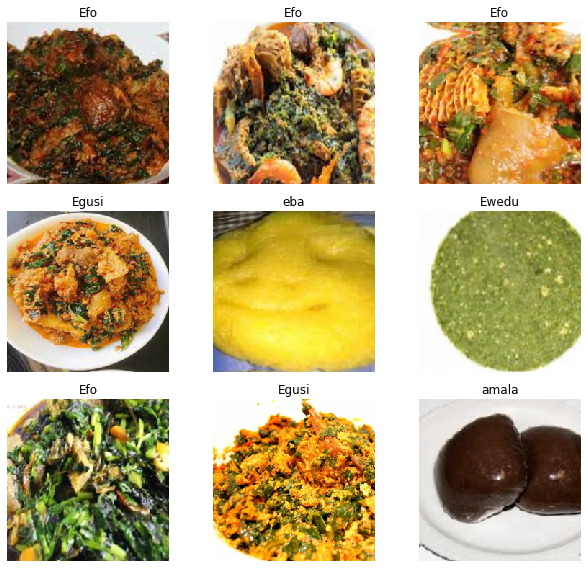

In [0]:
data_food.show_batch(rows=3, figsize=(9,8))

In [0]:
data_food.classes, data_food.c, len(data_food.train_ds), len(data_food.valid_ds)

(['Akara',
  'Efo',
  'Egusi',
  'Ewa Agoyin',
  'Ewedu',
  'Fufu',
  'Moi Moi',
  'Ofada ',
  'amala',
  'eba',
  'iyan',
  'semo'],
 12,
 291,
 99)

In [0]:
# learn = create_cnn(data_food, epoch=5)

In [0]:
learn = cnn_learner(data_food, models.resnet50, metrics=[error_rate,accuracy])

Downloading: "https://download.pytorch.org/models/resnet50-19c8e357.pth" to /root/.cache/torch/checkpoints/resnet50-19c8e357.pth
100%|██████████| 97.8M/97.8M [00:05<00:00, 19.7MB/s]


In [0]:
learn.fit_one_cycle(4)

epoch,train_loss,valid_loss,error_rate,accuracy,time
0,3.016038,1.884488,0.535354,0.464646,03:12
1,1.747200,1.687740,0.353535,0.646465,02:46
2,1.207421,1.463481,0.272727,0.727273,02:46
3,0.927073,1.242190,0.262626,0.737374,02:49


In [0]:
learn.save('stage-1-73')

In [0]:
interp = ClassificationInterpretation.from_learner(learn)

losses,idxs = interp.top_losses()

len(data_food.valid_ds)==len(losses)==len(idxs)

True

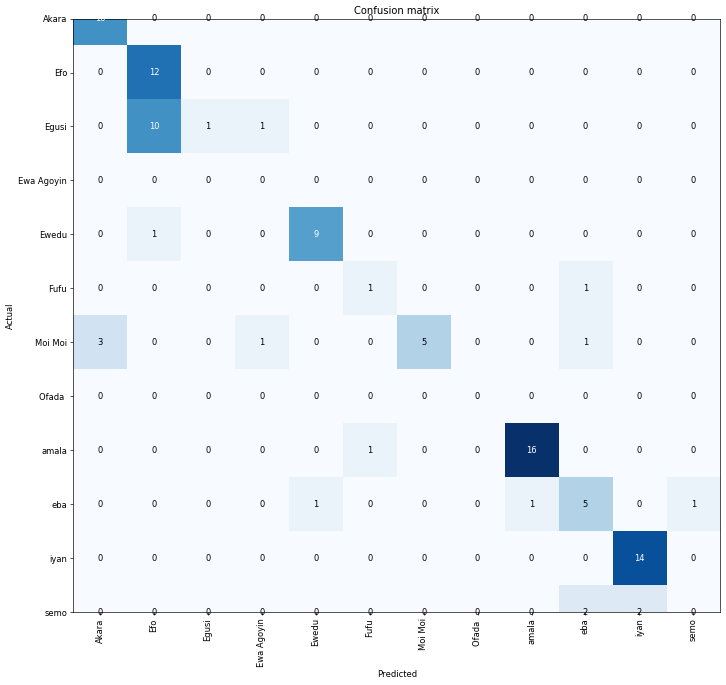

In [0]:
interp.plot_confusion_matrix(figsize=(12,12), dpi=60)


In [0]:
most_conf = interp.most_confused(min_val=2)

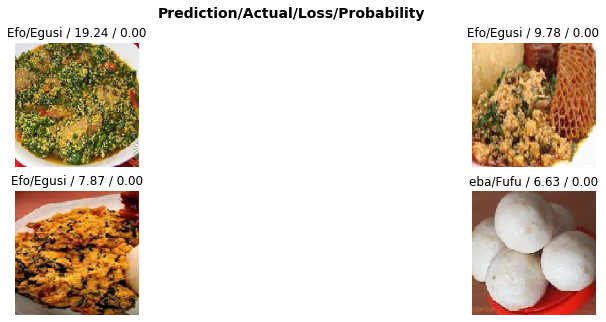

In [0]:
interp.plot_top_losses(4, figsize=(15,5))

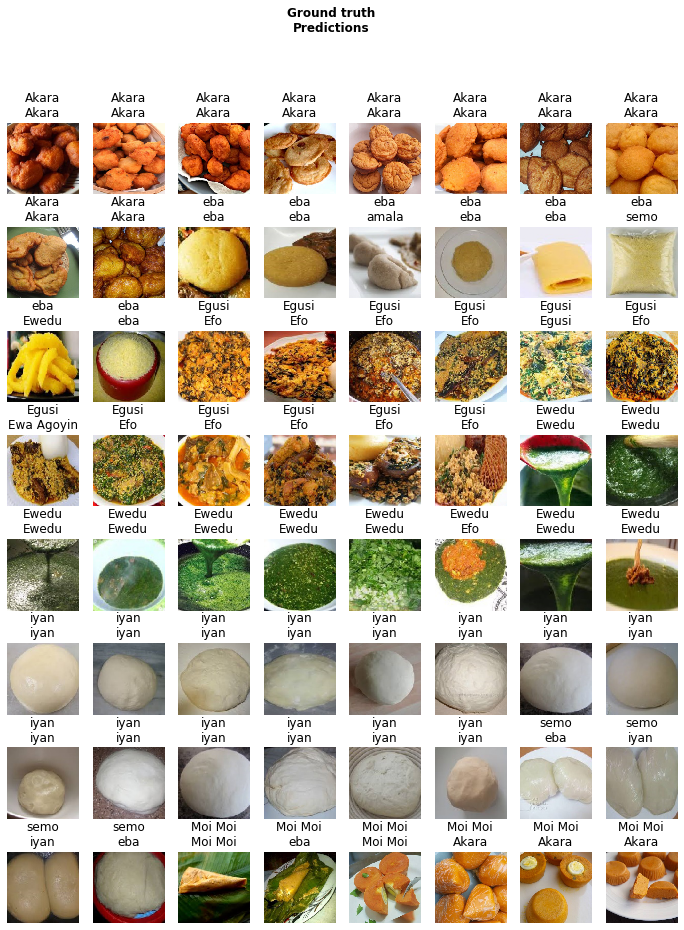

In [0]:

learn.show_results(rows=10, figsize=(12,15))